# Introducción al Aprendizaje Automático

Empecemos por decir que el aprendizaje automático *(Machine Learning en inglés)*, es una rama de las ciencias computacionales que usan algoritmos para darle a las máquinas *(ósea a las computadoras)* la habilidad de aprender por intermedio de los datos, sin que explícitamente sean programadas para ello *(Aclaremos que esta es una de tantas definiciones que se pueden encontrar en la [web](https://www.google.com/search?q=machine+learning&source=hp&ei=TyeOY7C0CI-bwbkP2OKf6A0&iflsig=AJiK0e8AAAAAY441X5T7-ip8CpKkKrf23oSJoJrX6jvn&ved=0ahUKEwjwl726_eL7AhWPTTABHVjxB90Q4dUDCAg&uact=5&oq=machine+learning&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQguEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOg4ILhCABBDHARDRAxDUAjoLCC4QgAQQxwEQ0QM6CAguEIAEENQCOgsILhCvARDHARCABDoHCAAQgAQQCjoICC4Q1AIQgAQ6BwguEIAEEApQnARYhRBguBFoAXAAeACAAcoBiAHuDpIBBjAuMTMuMZgBAKABAbABAA&sclient=gws-wiz))*.

En pocas palabras, en este notebook, vamos a tomar un montón *(por montón entiéndase un conjunto)* de datos, y luego emplearemos algunos algoritmos de aprendizaje, tal vez en particular uno *(Algunos de estos algoritmos tienen como su inspiración en modelos probabilísticos y estadísticos de aprendizaje)*, y a esto le aplicaremos algún ejercicio de predicción o clasificación, en resumen, esto es lo que llamaremos *Aprendizaje automático*.

## Conceptos básicos

A continuación, es importante que nos familiaricemos con algunos términos antes de continuar con la teoría. Nada teórico formal, es solo una aproximación.

### Aprendizaje Supervisado (Supervised Learning) y No Supervisado (Unsupervisded Learning)

En un modelo de aprendizaje automático **Supervisado** básicamente nos encargamos de definir las entradas y salidas de este. Un caso clásico es donde queremos clasificar una imagen dada, por ejemplo, tenemos un conjunto de imágenes de diferentes tipos de lindos gatitos, las digitalizamos y las convertimos en vectores, y le enseñamos al modelo que cada uno de estos vectores representa un tipo de gato y luego trataremos de un ingresar una imagen con un gato de una clase de estos y veremos que nuestro modelo podría ser capaz de decirnos si es un gato Mau egipcio o un Chartreux.

Por el otro tenemos el modelo **No Supervisado**, desconocemos las salidas, pero tenemos claro la entrada *(Y con esto nos referimos al conjunto de datos de entrada)*, lo que significa que el algoritmo debe ser capaz de establecer relaciones y/o patrones por nosotros. Dicho de otra forma, el algoritmo es capaz de encontrar un criterio para agrupar entradas similares usando solo la información recibida.

### ¿Clasificación o Regresión?

Podemos decir que por lo general los problemas con los que trataremos principalmente se podrían dividir en dos tipos:

* **Clasificación**: pensemos por un segundo, que podemos decirle a nuestro modelo que la salida es del tipo discreta, es decir $x \in A$, donde $A$ es un conjunto finito *(Digamos el conjunto de gatos de la introducción)*. En este tipo de problemas por lo general definimos las entradas y las salidas, es decir terminaremos con un modelo de aprendizaje supervisado.

* **Regresión**: para este caso, hablaremos del caso opuesto a clasificación, es decir nuestra salida es una variable continua, tal vez del tipo $x \in \mathbf{R}$, definida sobre algún intervalo. hablemos por ejemplo de la temperatura para el día de mañana, es decir que aquí la mayoría de los problemas obedecen a predicciones numéricas.

## Nuestro primer modelo de aprendizaje automático

La idea ahora es ir paso a paso desarrollando un modelo muy simple de aprendizaje automático. Durante este proceso haremos uso de las librerías de `Pandas` y `Numpy` e introduciremos una nueva que se llama `sklearn`.

Empecemos descargando los datos con los que vamos a trabajar. Para el desarrollo de nuestro modelo vamos a utilizar el clásico dataset de [iris](https://archive-beta.ics.uci.edu/dataset/53/iris):



In [1]:
# Se importa Pandas y se le asigna el alias pd
import pandas as pd

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Veamos ahora que tenemos en el conjunto de datos:

In [2]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Tenemos 150 observaciones en total (`count`), el conjunto tiene cuatro características (columnas: `sepal_lenght`, `sepal_width`, `petal_lenght` y `petal width`) y una clasificación de clase de iris(columna `class`), además, como las características del cunjunto son numéricas, podemos ver algunas estadísticas relevantes como la media, desviación estándar y algunos datos por percentiles. Más allá de eso vemos que nuestro conjunto muy bien organizado y a primera vista no parece tener ningún valor que vaya a ser un problema. ¿Podemos saber cuántas clases de iris fueron observadas? ¡Claro que sí!

In [3]:
df_iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


Como podemos ver, el método `value_counts()` nos dice que son 3 clases diferentes de iris, cada una con respectivamente 50 observaciones (esto se conoce como un conjunto de datos *balanceado*). Veámoslo gráficamente:


<AxesSubplot: xlabel='class', ylabel='count'>

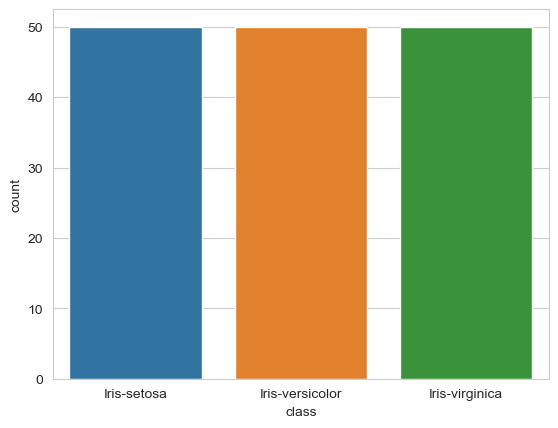

In [4]:
# Se importa la libreria Seaborn y se le asigna el alias sns
import seaborn as sns

# Se visualiza la columna class del DataFrame
sns.countplot(x=df_iris['class'])

Estamos de suerte, nuestros datos ya se encuentran balanceados, y en buena medida esto es importante en un problema de *clasificación*, pero en la vida real es más realista lidiar con conjuntos de datos que no se encuentran balanceados.

> Si los datos no están balanceados nos llevará a modelos no balanceados que tendrían muy bajo funcionamiento o poder de predicción.

## Correlaciones y algo más

A continuación, usaremos el poder de la visualización para descubrir si tenemos algún patrón o correlación, en algunas de las características del iris sobre el conjunto de datos:

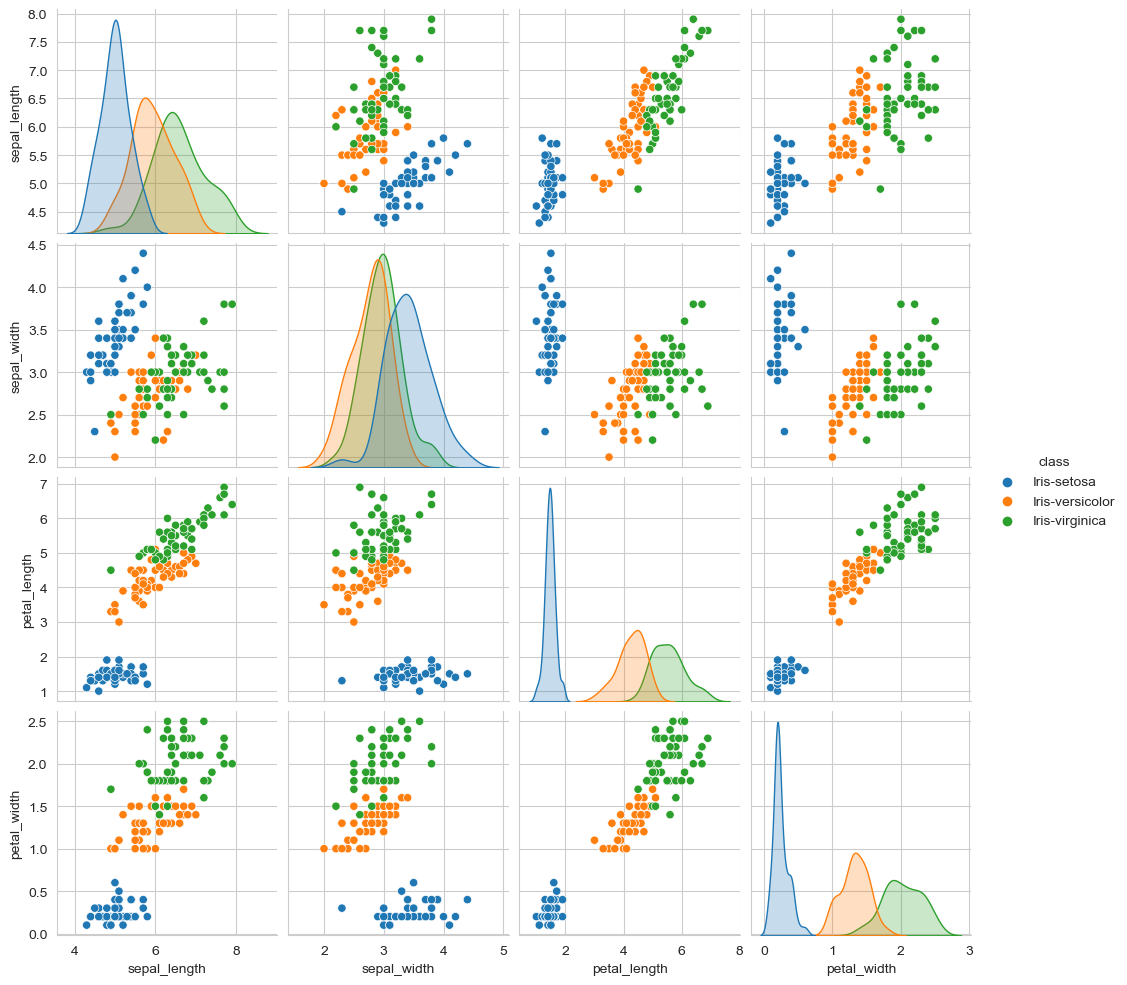

In [5]:
# Se importa Seaborn, y se visualizan los datos en un pairplot.
import seaborn as sns 
sns.pairplot(df_iris, hue="class")

Analizando un poco las gráficas, podemos ver que la mayoría de las características *(Ancho y largo de pétalo, largo y ancho de sépalo) * siguen una **distribución normal**, lo que significa que la mayoría de las observaciones se localizan al centro de los datos, por medio de esta lectura podríamos pensar cuál sería el mejor algoritmo para este problema.

También podemos ver que algunas clases de Iris, y en ciertas características los datos no se sobreponen, lo que nos dice que está bien que usemos la mayoría de las columnas posibles para tratar de evitar algún dato mentiroso.

Y ahora el siguiente paso es sobre las correlaciones que pueden existir entre las características y para ello haremos uso del **mapa de calor**, *por su nombre en inglés Heat Map*:

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_31320\1795721546.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", ax=axis)


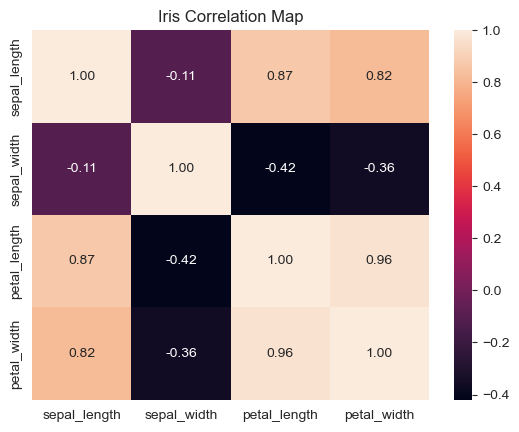

In [6]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots()

sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", ax=axis)

plt.title('Iris Correlation Map')

plt.show()

Si algunas de las columnas presentasen una alta correlación entre ellas, donde estas columnas representan las características independientes *(largo y ancho del pétalo o el largo y ancho del sépalo)*, a este se le conoce por su nombre de **Correlación Múltiple**, y desde un punto de vista estadístico inferencial esto podría llevarnos a resultados no confiables.

**La solución a esto puede ser tan sencilla como eliminar las columnas**, trata de eliminar las columnas cuya correlación equivale a $0.9$, para nuestra suerte no es algo que pase en nuestro conjunto de datos (¡Obviaremos esto en este ejercicio, sigamos!).


## Entrenamiento del modelo

Digamos que los datos están listos, lo primero que debemos hacer es identificar quien es el conjunto $X$ *(propiedades)* y quien es el conjunto $y$ *(categoría)*:

In [7]:
# Se excluye la columna clase, dado que es más una categoría
X = df_iris.drop(columns=['class'])

# Se toman solo las posibles categorías de iris
y = df_iris["class"].values

> En algunos casos, las magnitudes de las características variar en unidades de meidción o escala (por ejemplo, una característica puede estar medida en millones -población de personas-, y otra en unidades pequeñas -peso-), es decir son un poco diferentes, esto puede afectar la predicción y en estos casos es mejor normalizar los datos *(a veces se hace referencia a esto como el escalado)*. Este paso no se hará en el conjunto que estamos trabajando.

### Datos de entrenamiento y de prueba

El siguiente paso es dividir los datos en dos conjuntos, el de prueba y el de entrenamiento:

> Uno de los objetivos más importantes a la hora de crear un modelo de aprendizaje automático, es que esté balanceado, tengamos en cuenta que balanceado también hace referencia a que el modelo tiene un funcionamiento óptimo en relación con nuestras variables de interés.

Para separar los datos en los dos conjuntos utilizamos el método `train_test_split` de la librería `sklearn`. Notemos que comenzamos con dos conjuntos ($X$ y $y$) y salimos con cuatro ($X_{train}, X_{test}, y_{train}, y_{test}$)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)
X_test

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


Se pueden cambiar algunas características en la división de los datos, por ejemplo, qué cantidad queremos para el conjunto de entrenamiento y para el de prueba, en el caso de arriba, escogimos 25% de los datos para el conjunto de prueba `test_size=0.25`

## Random Forest Classifier

LLego el momento de entrenar el modelo conocido como **Random Forest Classifier**, recordemos que este es un algoritmo supervisado que se basa en el teorema de Bayes. No vamos a hablar mucho sobre el algorítmo ya que no es el proposito del notebook, pero se puede encontrar muchas fuentes de información para poder profundizar en este.

Empezemos con la implementación:

In [9]:
# Se importan las librerias de RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Se crean los conjuntos de pruebas y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

# Se crea la instancia del modelo de clasificacion Random Forest, el algoritmo de Random Forest usa
# arboles de decision, en este caso vamos a utilizar un 100 de estos.
forest = RandomForestClassifier(n_estimators=100, random_state=100)

Ahora, el siguiente paso es ajustar el modelo y generar predicciones:

In [10]:
# Se ajusta (fit) el modelo
forest.fit(X_train, y_train)

# Se generan las predicciones con el conjunto de pruebas
predictions = forest.predict(X_test)

# Se verifica la precision del modelo generado
accuracy_score(y_test, predictions)

0.9111111111111111

Y eso es basicamente todo. Paso a paso lo que hicimos fue: a) entrenar/ajustar un modelo con el conjunto de entrenamiento, b) predecir las clases de lo datos del conjunto de prueba, c) comparar las predicciones con la realidad y medirla con la métrica llamada `accuracy`.

Nuestro modelo generado tiene una precisión del **91%**, lo cual no es malo del todo, de hecho para ser nuestra primera vez suena bastante prometedor.
Una manera de entender la métrica es que: de cada 100 datos de flores Iris donde se conocen las cuatro características, aproximadamente 91 estarán correctamente clasificados.



### Otras métricas de evaluación 
Podemos evaluar el modelo previamente generado, con la revisión de otros indicadores como lo son la **precisión**, **el recuerdo** y la **puntuación F1**, generados por medio del método `classification_report()` para ello:


In [11]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.79      0.88        19
 Iris-virginica       0.73      1.00      0.85        11

       accuracy                           0.91        45
      macro avg       0.91      0.93      0.91        45
   weighted avg       0.93      0.91      0.91        45



## Consideraciones finales
Lo visto hasta el momento es el primer paso, muy introductorio, de entrenamiento de modelos de clasificación, hay muchos detalles que aún no hemos abordado y otros que no abordaremos. Cada modelo es diferente y lo que hacemos para entrenar uno posiblemente no sirva en otra situación, por ejemplo, existen muchas métricas de evaluación y dependiendo de las características del conjunto, del tipo de modelo (clasificación binaria, no binaria, regresión, entre otros) se debe trabajar con una u otra métrica.

En la sección práctica se abordará un modelo de clasificación binaria con otras métricas de evaluación y otras herramientas para mejorar el modelo.